# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 2. Методы нахождения оценок

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [48]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: /content/Cauchy.csv
100% 18.7k/18.7k [00:00<00:00, 18.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /content/Weibull.csv
100% 17.9k/17.9k [00:00<00:00, 19.0MB/s]


In [49]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на от\-резке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле Cauchy.csv находятся координаты точек
пересечения лучей с поверхностью Земли.

In [50]:
sample_1 = pd.read_csv("Cauchy.csv")["sample"].values

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


После преобразований, оценка максимального правдоподобия:
$\mathop{\rm argmax}\limits_{x_0} \left(- \sum_i^n \ln(1 + (x_i - x_0)^2) \right)$ или $\mathop{\rm argmin}\limits_{x_0} \sum_i^n \ln(1 + (x_i - x_0)^2)$

In [51]:
sample_size = sample_1.size
subsample_sizes = [10, 100, sample_size]
def ln_f(x, x0):
    return np.sum(np.log(1 + np.square(x0 - x.reshape((x.size, 1)))), axis=0)

In [52]:
def estimate(x):
    res = []
    for subsample_size in subsample_sizes:
      x0 = np.arange(-1000, 1000.01, 0.01)
      subsample = x[:subsample_size]
      res.append(x0[np.argmin(ln_f(subsample, x0))])
    return res

Сравните полученные результаты с `sps.cauchy.fit`

In [53]:
a = []
x0 = estimate(sample_1)
for subsample_size in subsample_sizes:
    a.append(sps.cauchy.fit(sample_1[:subsample_size], fscale=1)[0])
for i in range(0, 3):
    print(f"полученная оценка {x0[i]}")
    print(f"оценка с помощью sps.cauchy.fit: {a[i]}")

полученная оценка 208.52999999890085
оценка с помощью sps.cauchy.fit: 208.52722413171603
полученная оценка 207.89999999890142
оценка с помощью sps.cauchy.fit: 207.89950797131706
полученная оценка 207.97999999890135
оценка с помощью sps.cauchy.fit: 207.97829387204294


__Вывод:__ Можно заметить, что результаты практически идентичны

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [54]:
sample_2 = np.loadtxt("Weibull.csv")

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$
Подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. Постройте график (`plt.scatter`) выделив данные за первые четыре года красным цветом (`sample_2[:1461]`), остальные синим (`sample_2[1461:]`). Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла. 


В выборке есть нули, а логарифм нуля не определён, не будем учитывать эти нули

In [55]:
from statsmodels.distributions.empirical_distribution import ECDF
sample_2 = sample_2[sample_2 != 0]
ecdf = ECDF(sample_2)(sample_2)
x_hat = np.log(sample_2)
y_hat = np.log(-np.log(1 - ecdf))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


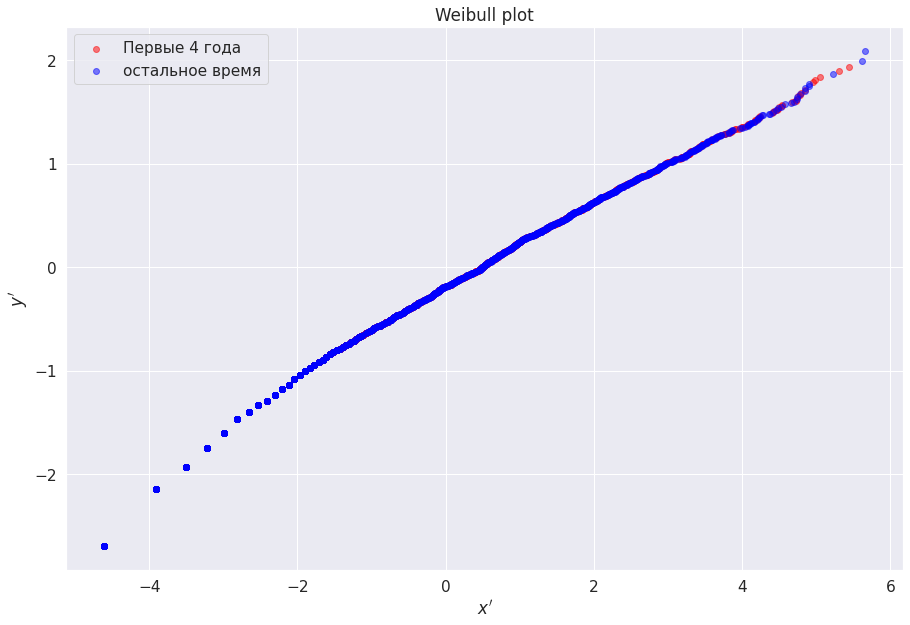

In [56]:
plt.figure(figsize=(15,10))
plt.scatter(x_hat[:1461], y_hat[:1461], alpha = 0.5, c = 'red',label = 'Первые 4 года')
plt.scatter(x_hat[1461:], y_hat[1461:], alpha = 0.5, c = 'blue', label = 'остальное время')
plt.title('Weibull plot')
plt.xlabel("$x'$")
plt.ylabel("$y'$")
plt.legend()
plt.show()

Сделайте вывод.

**Вывод** Гипотеза, что это именно распределение Вейбулла верна.

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

Оценка максимального правдоподобия:
$\mathop{\rm argmax}\limits_{\gamma} \left(n \ln\gamma - \sum_i^n x_i^\gamma + (\gamma - 1)\sum_i^n \ln x_i \right)$

In [57]:
subsample_sizes = [1461, sample_2.size]
def ln_f(x, gamma):
    x = x[x > 0]
    x = x.reshape((x.size, 1))
    return np.sum(np.log(gamma) - np.power(x, gamma) + (gamma - 1) * np.log(x), axis=0)
def estimate(x):
    res = []
    for subsample_size in subsample_sizes:
      gamma = np.arange(10 ** (-2), 10 ** 2 + 0.001, 0.001)
      subsample = x[:subsample_size]
      res.append(gamma[np.argmax(ln_f(subsample, gamma))])
    return res

Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [58]:
a = []
gamma = estimate(sample_2)
for subsample_size in subsample_sizes:
    subsample = sample_2[:subsample_size]
    a.append(sps.weibull_min.fit(subsample[subsample > 0], fscale=1, floc=0)[0])
for i in range(0, 2):
    print(f"полученная оценка {gamma[i]}")
    print(f"оценка с помощью sps.weibull.fit {a[i]}")

полученная оценка 0.41399999999999965
оценка с помощью sps.weibull.fit 0.4143554687499994
полученная оценка 0.4099999999999997
оценка с помощью sps.weibull.fit 0.41025390624999947


Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$). Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

**Вывод**

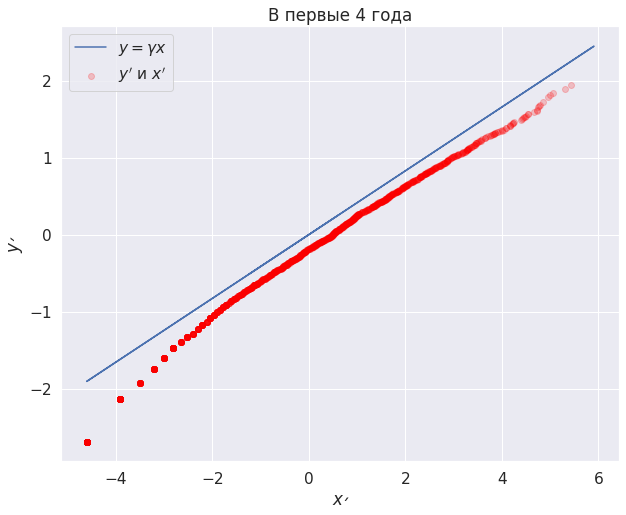

In [59]:
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(10,8))
plt.title(r'В первые 4 года')
plt.scatter(x_hat[:1461], y_hat[:1461], alpha = 0.2, c = 'red',label = '$y\'$ и $x\'$')
plt.plot(x_hat, gamma[0]*x_hat, label = '$y=\gamma x$')
plt.ylabel(r'$y\' $')
plt.xlabel(r'$x\' $')
plt.legend()
plt.show()

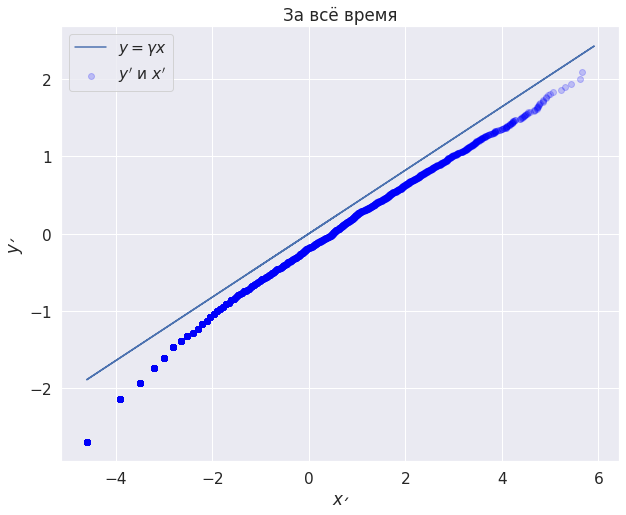

In [60]:
plt.figure(figsize=(10,8))
plt.title(r'За всё время')
plt.scatter(x_hat, y_hat, alpha = 0.2, c = 'blue', label = '$y\'$ и $x\'$')
plt.plot(x_hat, gamma[1]*x_hat, label = '$y=\gamma x$')
plt.ylabel(r'$y\' $')
plt.xlabel(r'$x\' $')
plt.legend()
plt.show()

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [61]:
N = 1000
Theta = 3
X_norm = sps.norm(loc = 0, scale = np.sqrt(Theta)).rvs(N)
X_uni = sps.uniform(0, Theta).rvs(N)
X_gamma = sps.gamma(a = 1, loc = 0, scale = Theta).rvs(N)

In [62]:
X_n = np.arange(1, N + 1)
est_norm = np.cumsum(np.square(X_norm)) / X_n
est_uni = 2 * np.cumsum(X_uni) / X_n
est_gamma = np.cumsum(X_gamma) / X_n

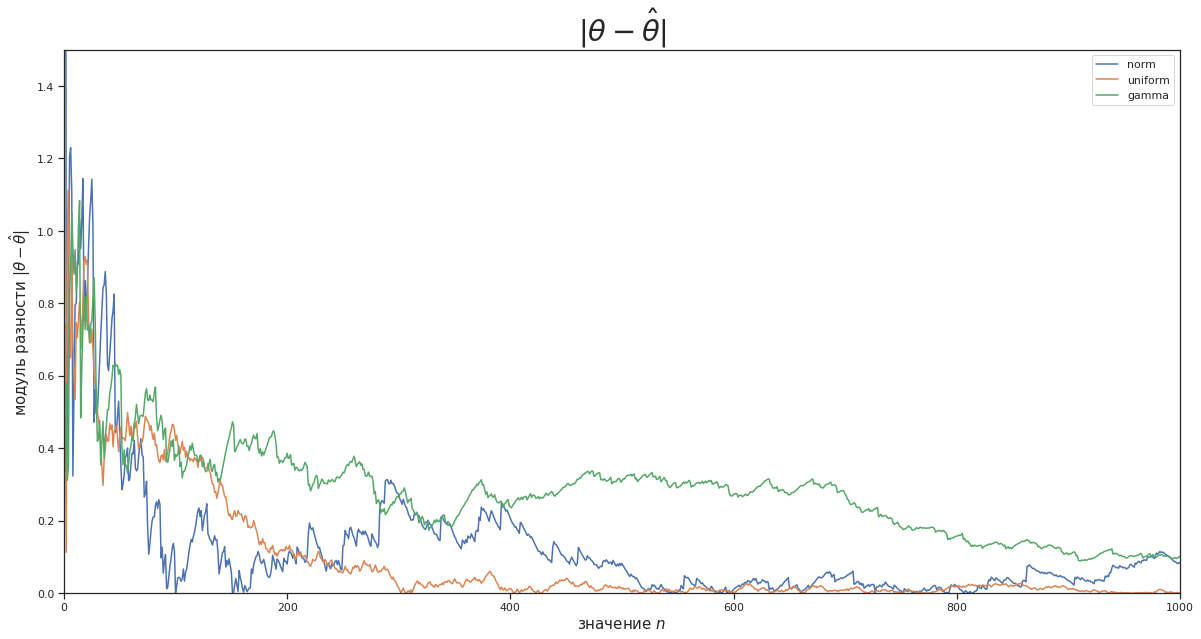

In [63]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="ticks")
sns.lineplot(x=X_n, y=np.abs(est_norm - Theta), label='norm')
sns.lineplot(x=X_n, y=np.abs(est_uni - Theta), label=r'uniform')
sns.lineplot(x=X_n, y=np.abs(est_gamma - Theta), label=r'gamma')
plt.ylim(0, 1.5)
plt.xlim(0, N)
plt.title(r'$ \|\theta - \hat{\theta} \|$', fontsize=29)
plt.ylabel(r'модуль разности $ \|\theta - \hat{\theta} \|$', fontsize=15)
plt.xlabel('значение $n$', fontsize=15)
plt.show()

__Вывод:__  оценки состоятельные и асимтотически-нормальные,модуль разности в итоге стремится к нулю.

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



In [64]:
sizes = [10, 50, *list(range(100, 1001, 100))]
def k_bts_sample(subsample):
  K = subsample.size
  ind = sps.randint.rvs(0, K, size=(K, K))
  return subsample[ind]


In [65]:
def find(sample):
  D = []
  avarage = []
  res = []
  for K in sizes:
    subsample = sample[:K]
    bts = k_bts_sample(subsample)
    est = np.mean(np.square(bts), axis=1)
    sub_avarage = np.mean(est)
    avarage.append(sub_avarage)
    sub_D = np.mean(np.square(est)) - np.square(sub_avarage)
    D.append(sub_D)
  res.append(D)
  res.append(avarage)
  return res

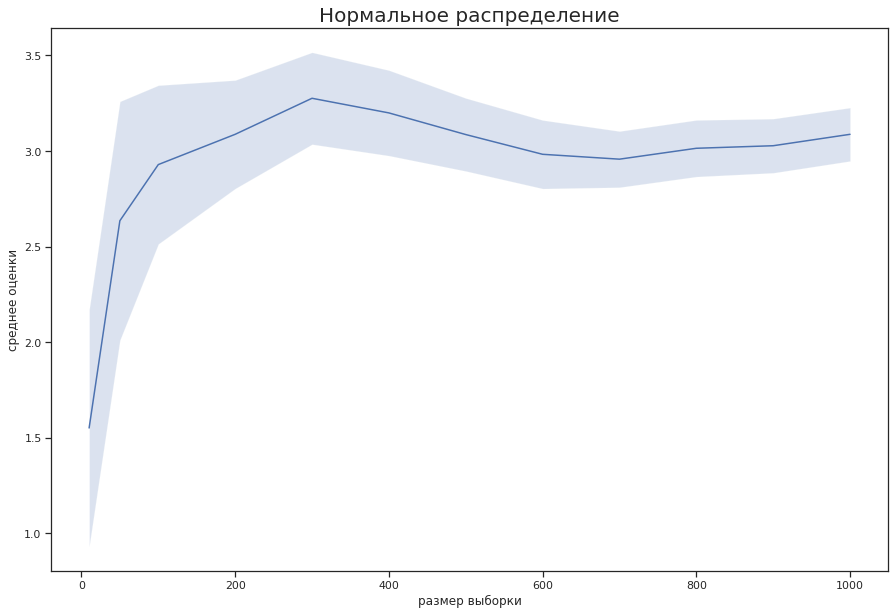

In [66]:
res = find(X_norm)
average = np.array(res[1])
D = np.array(res[0])
deviation = np.sqrt(D)

plt.figure(figsize=(15, 10))
sns.lineplot(x=sizes, y=average)
plt.fill_between(x=sizes, y1=average - deviation,  y2=average + deviation, alpha=0.2)
plt.title("Нормальное распределение", fontsize=20)
plt.ylabel("среднее оценки")
plt.xlabel("размер выборки")
plt.show()

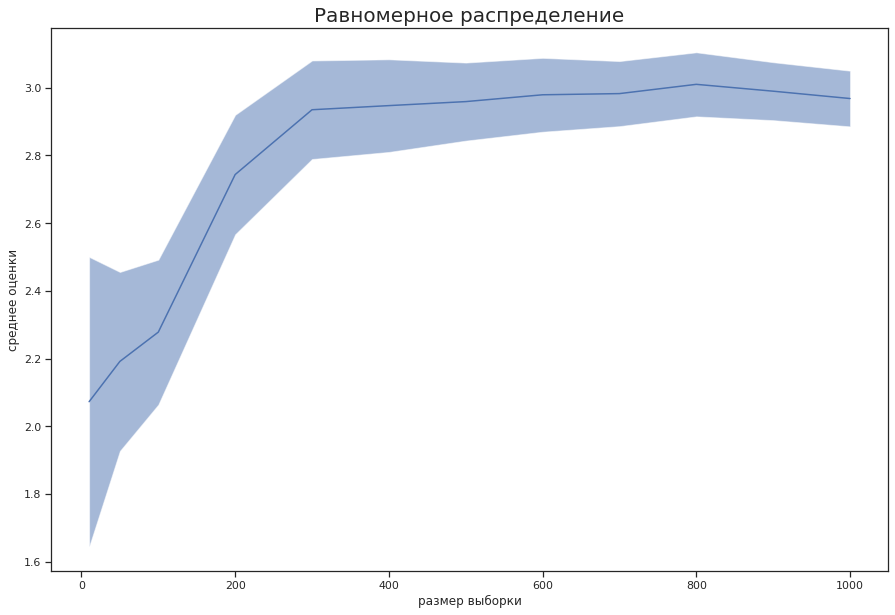

In [67]:
res = find(X_uni)
average = np.array(res[1])
D = np.array(res[0])
deviation = np.sqrt(D)

plt.figure(figsize=(15, 10))
sns.lineplot(x=sizes, y=average)
plt.fill_between(x=sizes, y1=average - deviation,  y2=average + deviation, alpha=0.2)
plt.title("Равномерное распределение", fontsize=20)
plt.ylabel("среднее оценки")
plt.xlabel("размер выборки")
plt.show()

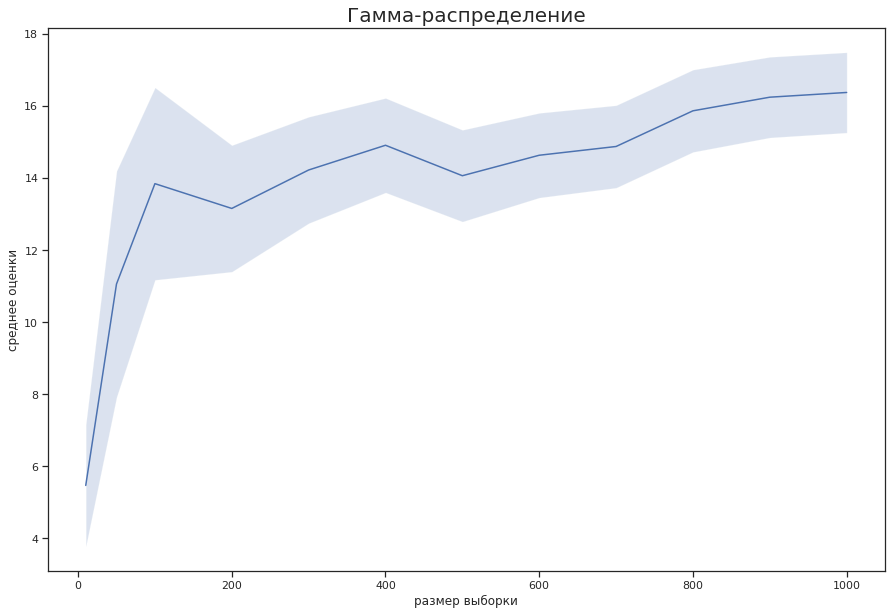

In [68]:
res = find(X_gamma)
average = np.array(res[1])
D = np.array(res[0])
deviation = np.sqrt(D)

plt.figure(figsize=(15, 10))
sns.lineplot(x=sizes, y=average)
plt.fill_between(x=sizes, y1=average - deviation,  y2=average + deviation, alpha=0.2)
plt.title("Гамма-распределение", fontsize=20)
plt.ylabel("среднее оценки")
plt.xlabel("размер выборки")
plt.show()

__Вывод:__ С увеличением размера бустрепных выборок, среднее значение оценок стремится к истинномуу значеннию параметра(закрашенная область сужается)